<a href="https://colab.research.google.com/github/shulm/Python-games/blob/master/ML_for_Stocks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello World!')

Hello World!


<h2>Machine Learning for Stocks Trading</h2>

Step 1: Getting some historical data. 

Libraries or Modules: 

Yahoo Finance module. 
Create charts
handle dataframes - Pandas
We need datetime functions

     |████████████████████████████████| 62 kB 682 kB/s 


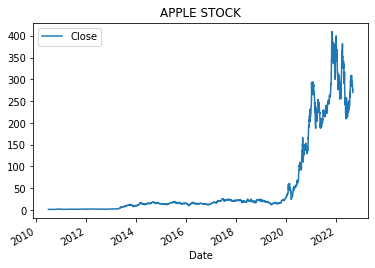

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import datetime
from datetime import date, time

#Install Yahoo Finance Libraries
try:
  import yfinance
except:
  !pip install -q yfinance 
  import yfinance 
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
try:
  import yahoofinancials
except:
  !pip install -q yahoofinancials 
  import yahoofinancials 

import yfinance as yf
from yahoofinancials import YahooFinancials 

import warnings 
warnings.filterwarnings("ignore")

#Download our Historical Data
df = yf.download('TSLA',
                 start='2010-01-01',
                 end=date.today(),
                 progress=False,)

#Create a simple chart
df.plot(y='Close', title='APPLE STOCK')
plt.show()

Creating Technical Analysis Indicators and we are going to also plot them

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100)
Date,,,,,,,,,,,,
2010-11-17,6.040,6.150,5.722,5.898,5.898,3750000,42.760467,69.700192,70.783627,150.212863,236.167231,362.534820
2010-11-18,6.134,6.148,5.784,5.978,5.978,4780500,63.033852,71.443451,71.753104,137.781350,214.555056,345.275952
2010-11-19,6.032,6.274,5.940,6.198,6.198,5752500,87.460627,75.893228,74.280580,138.690184,211.252621,361.454180
2010-11-22,6.314,6.690,6.300,6.680,6.680,7648500,96.781023,82.759870,78.763906,160.222311,233.454890,403.225138
2010-11-23,6.658,7.136,6.438,6.914,6.914,7889000,98.130352,85.154870,80.537641,164.201700,233.880135,405.588184


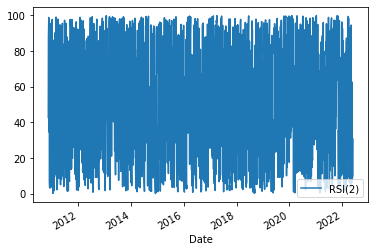

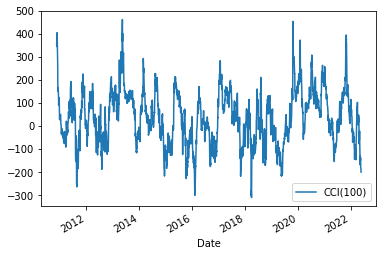

In [ ]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta
  import pandas_ta as ta 

df['RSI(2)'] = ta.rsi(df['Close'],length=2)
df['RSI(7)'] = ta.rsi(df['Close'],length=7)
df['RSI(14)'] = ta.rsi(df['Close'],length=14)
df['CCI(30)'] = ta.cci(close=df['Close'],length=30,high=df['High'],low=df['Low'])
df['CCI(50)'] = ta.cci(close=df['Close'],length=50,high=df['High'],low=df['Low'])
df['CCI(100)'] = ta.cci(close=df['Close'],length=100,high=df['High'],low=df['Low'])

#Drop NaN Values
df = df.dropna()

#Create a plot showing some of our indicators
df.plot(y='RSI(2)')
df.plot(y='CCI(100)')

#How's our current dataframe going
df.head()

Prepare our data labelling

What do we want to do over here?

When we place our trade: Buy at Open (over the next day).
We want to close our trade: At the next day at open. 

Formula: 

Handling the returns this ways: Buy: Open(-1) - Closing: Open(-2)

We want to label our data in the following day.

BUY SIGNAL: Open(-2) > Open(-1)

SELL SIGNAL: Open(-2) < Open(-1)

Indicators the current situations, and our labels take a look ahead of time to determine if we have a pattern.

In [ ]:
import numpy as np
df['LABEL'] = np.where( df['Open'].shift(-2).gt(df['Open'].shift(-1)),"1","0")
df = df.dropna()
df.head()

,Open,High,Low,Close,Adj Close,Volume,RSI(2),RSI(7),RSI(14),CCI(30),CCI(50),CCI(100),LABEL
Date,,,,,,,,,,,,,
2010-11-17,6.040,6.150,5.722,5.898,5.898,3750000,42.760467,69.700192,70.783627,150.212863,236.167231,362.534820,0
2010-11-18,6.134,6.148,5.784,5.978,5.978,4780500,63.033852,71.443451,71.753104,137.781350,214.555056,345.275952,1
2010-11-19,6.032,6.274,5.940,6.198,6.198,5752500,87.460627,75.893228,74.280580,138.690184,211.252621,361.454180,1
2010-11-22,6.314,6.690,6.300,6.680,6.680,7648500,96.781023,82.759870,78.763906,160.222311,233.454890,403.225138,1
2010-11-23,6.658,7.136,6.438,6.914,6.914,7889000,98.130352,85.154870,80.537641,164.201700,233.880135,405.588184,1


Creating a Neural Network

SkLearn

In [ ]:
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.neural_network import MLPRegressor 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error 
from math import sqrt  
from sklearn.metrics import r2_score 

#Fitting - Indicators and our Labelling
X = df[df.columns[6:-1]].values 
y = df['LABEL'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) 

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=1000) 
mlp.fit(X_train,y_train) 

predict_train = mlp.predict(X_train) 
predict_test = mlp.predict(X_test)

from sklearn.metrics import classification_report,confusion_matrix 

print(' Train Data Accuracy ')
print(classification_report(y_train,predict_train)) 

print( ' Testing Data Accuracy ' )
print( classification_report(y_test,predict_test) )

 Train Data Accuracy 
              precision    recall  f1-score   support

           0       0.51      0.28      0.36       959
           1       0.54      0.76      0.63      1070

    accuracy                           0.53      2029
   macro avg       0.53      0.52      0.50      2029
weighted avg       0.53      0.53      0.50      2029

 Testing Data Accuracy 
              precision    recall  f1-score   support

           0       0.47      0.29      0.36       425
           1       0.51      0.69      0.59       445

    accuracy                           0.50       870
   macro avg       0.49      0.49      0.47       870
weighted avg       0.49      0.50      0.48       870



Backtesting our Model 

Measure the returns obtained by trading our model

[]

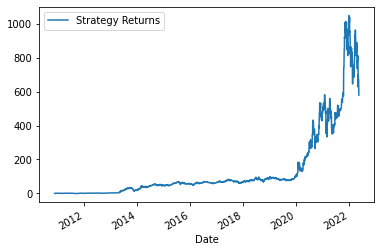

In [ ]:
df['Prediction'] = np.append(predict_train,predict_test)
df['Strategy Returns'] = np.where( df['Prediction'].eq("1"),df['Open'].shift(-2)-df['Open'].shift(-1),0)

df['Strategy Returns'] = df['Strategy Returns'].cumsum() 

df.plot(y='Strategy Returns')
plt.plot()

In [ ]:
prediction = df.iloc[-1]['Prediction'] 

if prediction=="1":
  print("Today's return forecast: UP")
else: 
  print("Today's return forecast: DOWN")

Today's return forecast: UP


In [61]:
data = yf.download(  # or pdr.get_data_yahoo(...
        # tickers list or string as well
        tickers = "EURUSD=X",

        # use "period" instead of start/end
        # valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
        # (optional, default is '1mo')
        period = "ytd",

        # fetch data by interval (including intraday if period < 60 days)
        # valid intervals: 1m,2m,5m,15m,30m,60m,90m,1h,1d,5d,1wk,1mo,3mo
        # (optional, default is '1d')
        interval = "1h",

        # group by ticker (to access via data['SPY'])
        # (optional, default is 'column')
        group_by = 'ticker',

        # adjust all OHLC automatically
        # (optional, default is False)
        auto_adjust = True,

        # download pre/post regular market hours data
        # (optional, default is False)
        prepost = True,

        # use threads for mass downloading? (True/False/Integer)
        # (optional, default is True)
        threads = True,

        # proxy URL scheme use use when downloading?
        # (optional, default is None)
        proxy = None
    )

[*********************100%***********************]  1 of 1 completed


In [4]:
try:
  import pandas_ta as ta
except:
  !pip install -q pandas_ta

In [5]:
from numpy import NaN, select
from pandas import DataFrame, to_datetime, infer_freq
from pandas_ta.utils import is_datetime_ordered, verify_series


def pivots(_open, high, low, close, anchor=None, method=None):
    _open = verify_series(_open)
    high = verify_series(high)
    low = verify_series(low)
    close = verify_series(close)
    anchor = anchor.upper() if anchor and isinstance(anchor, str) and len(anchor) >= 1 else "D"
    method_list = ["traditional", "fibonacci", "woodie", "classic", "demark", "camarilla"]
    method = method if method in method_list else "traditional"
    date = (
        to_datetime(close.index, unit="ms")
        if not is_datetime_ordered(close) and verify_series(close)
        else close.index
    )

    freq = infer_freq(date)
    df = DataFrame(
        index=date,
        data={"open": _open.values, "high": high.values, "low": low.values, "close": close.values},
    )

    if freq is not anchor:
        a = DataFrame()
        a["open"] = df["open"].resample(anchor).first()
        a["high"] = df["high"].resample(anchor).max()
        a["low"] = df["low"].resample(anchor).min()
        a["close"] = df["close"].resample(anchor).last()
    else:
        a = df

    # Calculate the Pivot Points
    if method == "traditional":
        a["p"] = (a.high.values + a.low.values + a.close.values) / 3

        a["bc"] = (a.high.values + a.low.values ) / 2
        a["tc"] = (2 * a.p.values) - a.bc.values
        a["rng"] = abs(a.tc.values-a.bc.values)/a.p.values*100

        a["s1"] = (2 * a.p.values) - a.high.values
        a["s2"] = a.p.values - (a.high.values - a.low.values)
        a["s3"] = a.p.values - (a.high.values - a.low.values) * 2
        a["r1"] = (2 * a.p.values) - a.low.values
        a["r2"] = a.p.values + (a.high.values - a.low.values)
        a["r3"] = a.p.values + (a.high.values - a.low.values) * 2

    elif method == "fibonacci":
        a["p"] = (a.high.values + a.low.values + a.close.values) / 3
        a["pivot_range"] = a.high.values - a.low.values
        a["s1"] = a.p.values - 0.382 * a.pivot_range.values
        a["s2"] = a.p.values - 0.618 * a.pivot_range.values
        a["s3"] = a.p.values - 1 * a.pivot_range.values
        a["r1"] = a.p.values + 0.382 * a.pivot_range.values
        a["r2"] = a.p.values + 0.618 * a.pivot_range.values
        a["r3"] = a.p.values + 1 * a.pivot_range.values
        a.drop(["pivot_range"], axis=1, inplace=True)
    elif method == "woodie":
        a["pivot_range"] = a.high.values - a.low.values
        a["p"] = (a.high.values + a.low.values + a.open.values * 2) / 4
        a["s1"] = a.p.values * 2 - a.high.values
        a["s2"] = a.p.values - 1 * a.pivot_range.values
        a["s3"] = a.high.values + 2 * (a.p.values - a.low.values)
        a["s4"] = a.s3 - a.p.values
        a["r1"] = a.p.values * 2 - a.low.values
        a["r2"] = a.p.values + 1 * a.pivot_range.values
        a["r3"] = a.low.values - 2 * (a.high.values - a.p.values)
        a["r4"] = a.r3 + a.p.values
        a.drop(["pivot_range"], axis=1, inplace=True)
    elif method == "classic":
        a["p"] = (a.high.values + a.low.values + a.close.values) / 3
        a["pivot_range"] = a.high.values - a.low.values
        a["s1"] = a.p.values * 2 - a.high.values
        a["s2"] = a.p.values - 1 * a.pivot_range.values
        a["s3"] = a.p.values - 2 * a.pivot_range.values
        a["s4"] = a.p.values - 3 * a.pivot_range.values
        a["r1"] = a.p.values * 2 - a.low.values
        a["r2"] = a.p.values + 1 * a.pivot_range.values
        a["r3"] = a.p.values + 2 * a.pivot_range.values
        a["r4"] = a.p.values + 3 * a.pivot_range.values
        a.drop(["pivot_range"], axis=1, inplace=True)
    elif method == "demark":
        conds = (
            a.close.values == a.open.values,
            a.close.values > a.open.values,
        )
        vals = (
            a.high.values + a.low.values + a.close.values * 2,
            a.high.values * 2 + a.low.values + a.close.values,
        )
        p = select(conds, vals, default=(a.high.values + a.low.values * 2 + a.close.values))
        a["p"] = p / 4
        a["s1"] = p / 2 - a.high.values
        a["r1"] = p / 2 - a.low.values
    elif method == "camarilla":
        a["p"] = (a.high.values + a.low.values + a.close.values) / 3
        a["pivot_range"] = a.high.values - a.low.values
        a["s1"] = a.close.values - a.pivot_range.values * 1.1 / 12
        a["s2"] = a.close.values - a.pivot_range.values * 1.1 / 6
        a["s3"] = a.close.values - a.pivot_range.values * 1.1 / 4
        a["s4"] = a.close.values - a.pivot_range.values * 1.1 / 2
        a["r1"] = a.close.values + a.pivot_range.values * 1.1 / 12
        a["r2"] = a.close.values + a.pivot_range.values * 1.1 / 6
        a["r3"] = a.close.values + a.pivot_range.values * 1.1 / 4
        a["r4"] = a.close.values + a.pivot_range.values * 1.1 / 2
        a.drop(["pivot_range"], axis=1, inplace=True)
    else:
        raise ValueError("Invalid method")

    if freq is not anchor:
        pivots_df = a.reindex(df.index, method="ffill")
    else:
        pivots_df = a

    pivots_df.drop(columns=["open", "high", "low", "close"], inplace=True)

    return pivots_df

In [33]:
hlp = pivots(data["Open"],data["High"], data["Low"], data["Close"], anchor=23,method="fibonacci")
print(hlp)

                                  p        s1        s2        s3        r1  \
2022-01-03 00:00:00+00:00  1.132219  1.128491  1.126188  1.122460  1.135947   
2022-01-03 01:00:00+00:00  1.132219  1.128491  1.126188  1.122460  1.135947   
2022-01-03 02:00:00+00:00  1.132219  1.128491  1.126188  1.122460  1.135947   
2022-01-03 03:00:00+00:00  1.132219  1.128491  1.126188  1.122460  1.135947   
2022-01-03 04:00:00+00:00  1.132219  1.128491  1.126188  1.122460  1.135947   
...                             ...       ...       ...       ...       ...   
2022-09-02 18:00:00+01:00  0.998021  0.994512  0.992344  0.988836  1.001530   
2022-09-02 19:00:00+01:00  0.998021  0.994512  0.992344  0.988836  1.001530   
2022-09-02 20:00:00+01:00  0.998021  0.994512  0.992344  0.988836  1.001530   
2022-09-02 21:00:00+01:00  0.998021  0.994512  0.992344  0.988836  1.001530   
2022-09-02 22:00:00+01:00  0.998021  0.994512  0.992344  0.988836  1.001530   

                                 r2        r3  
202

In [34]:
eu=pd.merge(data, hlp, how='left',left_index=True,right_index=True)


In [21]:
eu=eu.drop(columns="Volume")

In [35]:
#eu.plot()
#eu.plot(figsize=(25,23));
eu

,Open,High,Low,Close,Volume,p,s1,s2,s3,r1,r2,r3
2022-01-03 00:00:00+00:00,1.137656,1.138045,1.136493,1.136622,0,1.132219,1.128491,1.126188,1.122460,1.135947,1.138250,1.141978
2022-01-03 01:00:00+00:00,1.136622,1.137268,1.135332,1.136105,0,1.132219,1.128491,1.126188,1.122460,1.135947,1.138250,1.141978
2022-01-03 02:00:00+00:00,1.136235,1.136493,1.134559,1.134559,0,1.132219,1.128491,1.126188,1.122460,1.135947,1.138250,1.141978
2022-01-03 03:00:00+00:00,1.134687,1.135718,1.134559,1.135203,0,1.132219,1.128491,1.126188,1.122460,1.135947,1.138250,1.141978
2022-01-03 04:00:00+00:00,1.135460,1.135589,1.134301,1.134430,0,1.132219,1.128491,1.126188,1.122460,1.135947,1.138250,1.141978
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-02 18:00:00+01:00,0.997208,0.997506,0.995124,0.996314,0,0.998021,0.994512,0.992344,0.988836,1.001530,1.003697,1.007206
2022-09-02 19:00:00+01:00,0.996413,0.997208,0.996214,0.996810,0,0.998021,0.994512,0.992344,0.988836,1.001530,1.003697,1.007206
2022-09-02 20:00:00+01:00,0.997009,0.997407,0.994827,0.995619,0,0.998021,0.994512,0.992344,0.988836,1.001530,1.003697,1.007206
2022-09-02 21:00:00+01:00,0.995718,0.996314,0.995520,0.995818,0,0.998021,0.994512,0.992344,0.988836,1.001530,1.003697,1.007206


In [ ]:
cl=eu["Close"]
lw=eu["Low"]
sl=eu["Low"]
for i in cl:
  print(i)

In [ ]:
data_d

In [44]:
data_d.index.resolution

'day'

In [43]:
data.index.resolution

'hour'

In [45]:
data['DateTime']=data.index

In [50]:
data['DateTime'].resample('D').ffill()

2022-01-03 00:00:00+00:00   2022-01-03 00:00:00+00:00
2022-01-04 00:00:00+00:00   2022-01-04 00:00:00+00:00
2022-01-05 00:00:00+00:00   2022-01-05 00:00:00+00:00
2022-01-06 00:00:00+00:00   2022-01-06 00:00:00+00:00
2022-01-07 00:00:00+00:00   2022-01-07 00:00:00+00:00
                                       ...           
2022-08-29 00:00:00+01:00   2022-08-29 00:00:00+01:00
2022-08-30 00:00:00+01:00   2022-08-30 00:00:00+01:00
2022-08-31 00:00:00+01:00   2022-08-31 00:00:00+01:00
2022-09-01 00:00:00+01:00   2022-09-01 00:00:00+01:00
2022-09-02 00:00:00+01:00   2022-09-02 00:00:00+01:00
Freq: D, Name: DateTime, Length: 243, dtype: datetime64[ns, Europe/London]

In [64]:
data['DateTime']=data.index
data['DateTime']=data['DateTime'].dt.strftime('%m/%d/%Y')

In [ ]:
data

In [66]:
data_d['DateTime']=data_d.index
data_d['DateTime']=data_d['DateTime'].dt.strftime('%m/%d/%Y')

In [67]:
data_d

,Open,High,Low,Close,Volume,DateTime
Date,,,,,,
2022-01-03,1.137385,1.137592,1.128541,1.137346,0,01/03/2022
2022-01-04,1.130199,1.132300,1.127345,1.130224,0,01/04/2022
2022-01-05,1.128541,1.134559,1.127764,1.128363,0,01/05/2022
2022-01-06,1.131222,1.133067,1.128554,1.131350,0,01/06/2022
2022-01-07,1.129586,1.135976,1.129050,1.129688,0,01/07/2022
...,...,...,...,...,...,...
2022-08-30,1.001402,1.005227,0.998343,1.001402,0,08/30/2022
2022-08-31,1.002506,1.007739,0.997168,1.002506,0,08/31/2022
2022-09-01,1.003905,1.004581,0.991739,1.003905,0,09/01/2022


In [68]:
result = pd.merge(data,
                 data_d,
                 on='DateTime')

In [69]:
result

,Open_x,High_x,Low_x,Close_x,Volume_x,DateTime,Open_y,High_y,Low_y,Close_y,Volume_y
0,1.137656,1.138045,1.136493,1.136622,0,01/03/2022,1.137385,1.137592,1.128541,1.137346,0
1,1.136622,1.137268,1.135332,1.136105,0,01/03/2022,1.137385,1.137592,1.128541,1.137346,0
2,1.136235,1.136493,1.134559,1.134559,0,01/03/2022,1.137385,1.137592,1.128541,1.137346,0
3,1.134687,1.135718,1.134559,1.135203,0,01/03/2022,1.137385,1.137592,1.128541,1.137346,0
4,1.135460,1.135589,1.134301,1.134430,0,01/03/2022,1.137385,1.137592,1.128541,1.137346,0
...,...,...,...,...,...,...,...,...,...,...,...
4159,0.997208,0.997506,0.995124,0.996314,0,09/02/2022,0.995233,1.003331,0.995124,0.995233,0
4160,0.996413,0.997208,0.996214,0.996810,0,09/02/2022,0.995233,1.003331,0.995124,0.995233,0
4161,0.997009,0.997407,0.994827,0.995619,0,09/02/2022,0.995233,1.003331,0.995124,0.995233,0
4162,0.995718,0.996314,0.995520,0.995818,0,09/02/2022,0.995233,1.003331,0.995124,0.995233,0
